In [1]:
########## Environment set up ##########

source("photosynthesis_response_curves.R")


# ggplot configuration

theme_set(theme_bw() +
  theme(
    axis.text = element_text(size = 16),
    text = element_text(size = 18)
  ))

options(repr.plot.width = 15)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




## Load Data

In [2]:
load_photo_data <- function(data_path) {
  data <- read.delim(
    data_path,
    comment.char = "#", row.names = 1,
    colClasses = c(
      "character", "factor", "factor", "numeric", "numeric", "factor"
    )
  )
  colnames(data)[c(3, 4)] <- sapply(
    strsplit(colnames(data)[c(3, 4)], "_"), "[[", 1
  )
  data
}

density_data <- load_photo_data("../Data/density.tsv")
leaf_age_data <- load_photo_data("../Data/leaf_age.tsv")

cat("Density:\n")
head(density_data)
cat("Leaf age:\n")
head(leaf_age_data)


Density:


,Density,Sample,QF,Photo,QF_class
,<fct>,<fct>,<dbl>,<dbl>,<fct>
D9x9_QF2000_S1,9x9,1,1998.826,16.97110,2000
D9x9_QF1800_S1,9x9,1,1799.985,15.98396,1800
D9x9_QF1600_S1,9x9,1,1600.670,14.97066,1600
D9x9_QF1400_S1,9x9,1,1400.155,14.45133,1400
D9x9_QF1200_S1,9x9,1,1200.209,13.47842,1200
D9x9_QF1000a_S1,9x9,1,1000.533,12.26550,1000


Leaf age:


,Leaf,Sample,QF,Photo,QF_class
,<fct>,<fct>,<dbl>,<dbl>,<fct>
L1_QF2000_S1,1,1,1999.084,10.074335,2000
L1_QF1800_S1,1,1,1800.724,9.812052,1800
L1_QF1600_S1,1,1,1600.601,9.368322,1600
L1_QF1400_S1,1,1,1399.447,9.086873,1400
L1_QF1200_S1,1,1,1198.551,8.824160,1200
L1_QF1000a_S1,1,1,1000.753,8.384254,1000


## Density data analysis

In [3]:
cat("### Estimating treatment group parameters:\n\n")
# Get Photosynthesis light-response curve parameters from non-linear regression
density_sample_lr_parameters <- lr_parameters_by_sample(
  density_data,
  treatment_index = which(colnames(density_data) == "Density")
)
# Estimate Photosynthesis light-response parameters by density condition
density_descriptive_df <- lr_summary_by_treatment(density_sample_lr_parameters)


### Estimating treatment group parameters:

Treatment 10x10 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 10x10 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 10x10 x Sample 3 Starting..

Waiting for profiling to be done...



Done!

Treatment 9.5x9.5 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 9.5x9.5 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 9.5x9.5 x Sample 3 Starting..

Waiting for profiling to be done...



Done!

Treatment 9x9 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 9x9 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 9x9 x Sample 3 Starting..

Waiting for profiling to be done...



Done!



,A_max.mean,A_max.stdErr,D_r.mean,D_r.stdErr,K.mean,K.stdErr,LCP.mean,LCP.stdErr,Phi.mean,Phi.stdErr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9x9,20.09842,1.2157224,0.5805992,0.09864886,453.5971,63.73978,12.924925,0.4963246,0.02287927,0.004398677
9.5x9.5,16.52621,0.3798986,0.7377665,0.08659855,322.5399,51.96735,15.368774,3.6034535,0.02672478,0.004489816
10x10,12.55292,0.2989788,0.4258310,0.15300245,238.8101,23.33681,8.816237,3.6739172,0.02670335,0.002615664


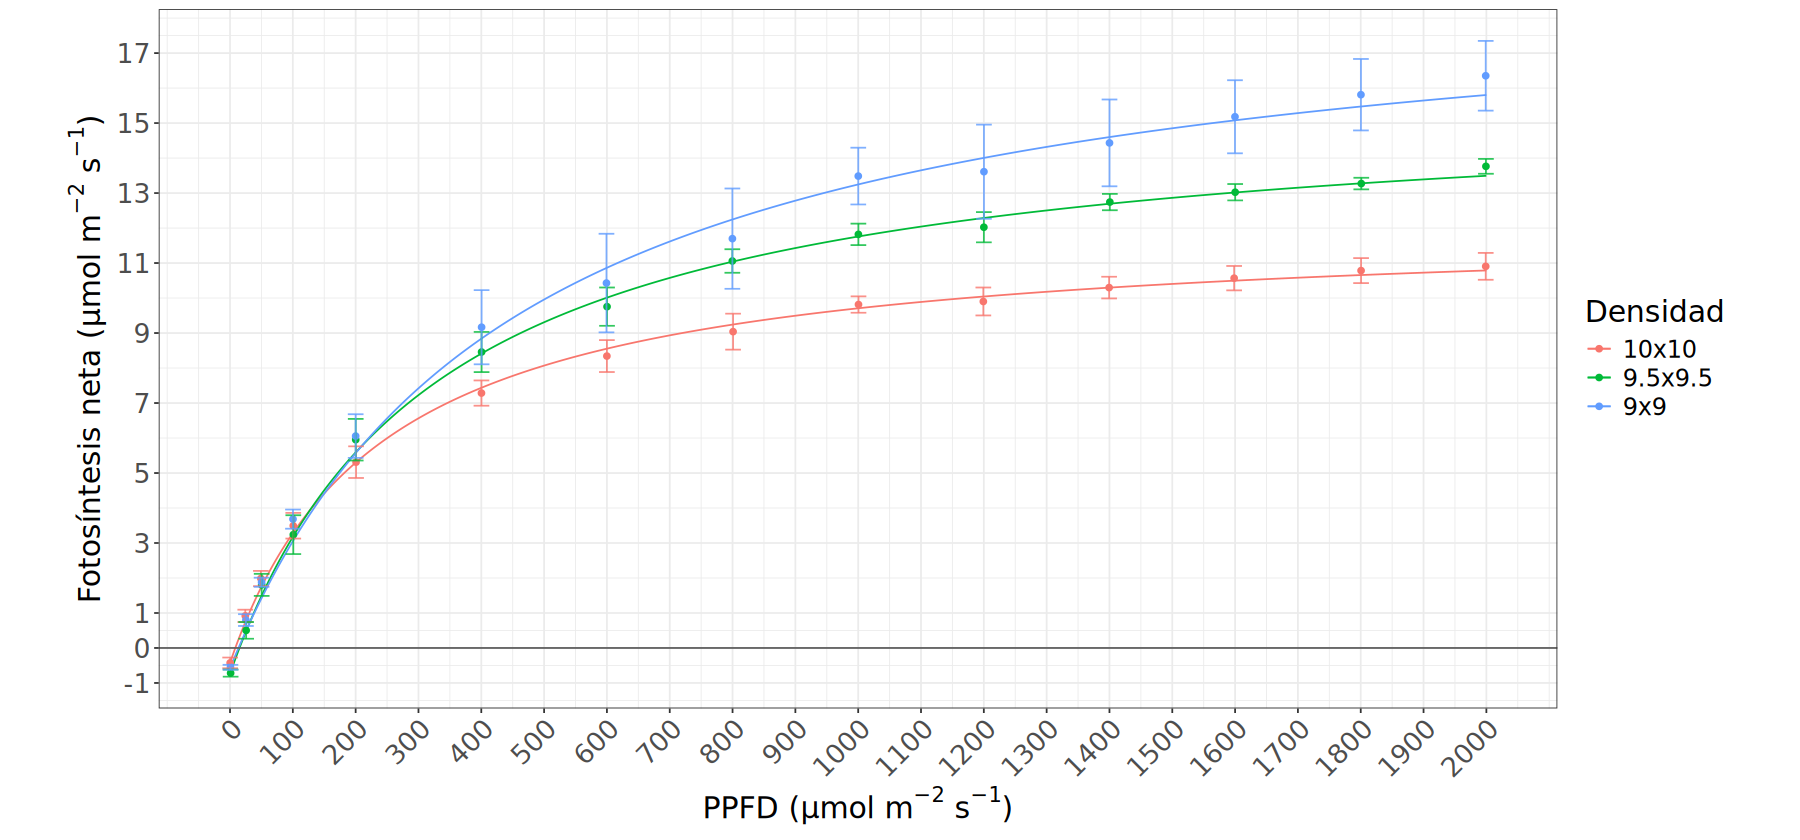

In [4]:
density_descriptive_df
density_group_summary <- summary_replicates(
  density_data,
  treatment_index = which(colnames(density_data) == "Density")
)
density_lr_plot <- lr_groups_plot(
  density_descriptive_df,
  max_qf = 2000, legend_title = "Densidad",
  group_summary = density_group_summary
)
density_lr_plot


### Differences by density

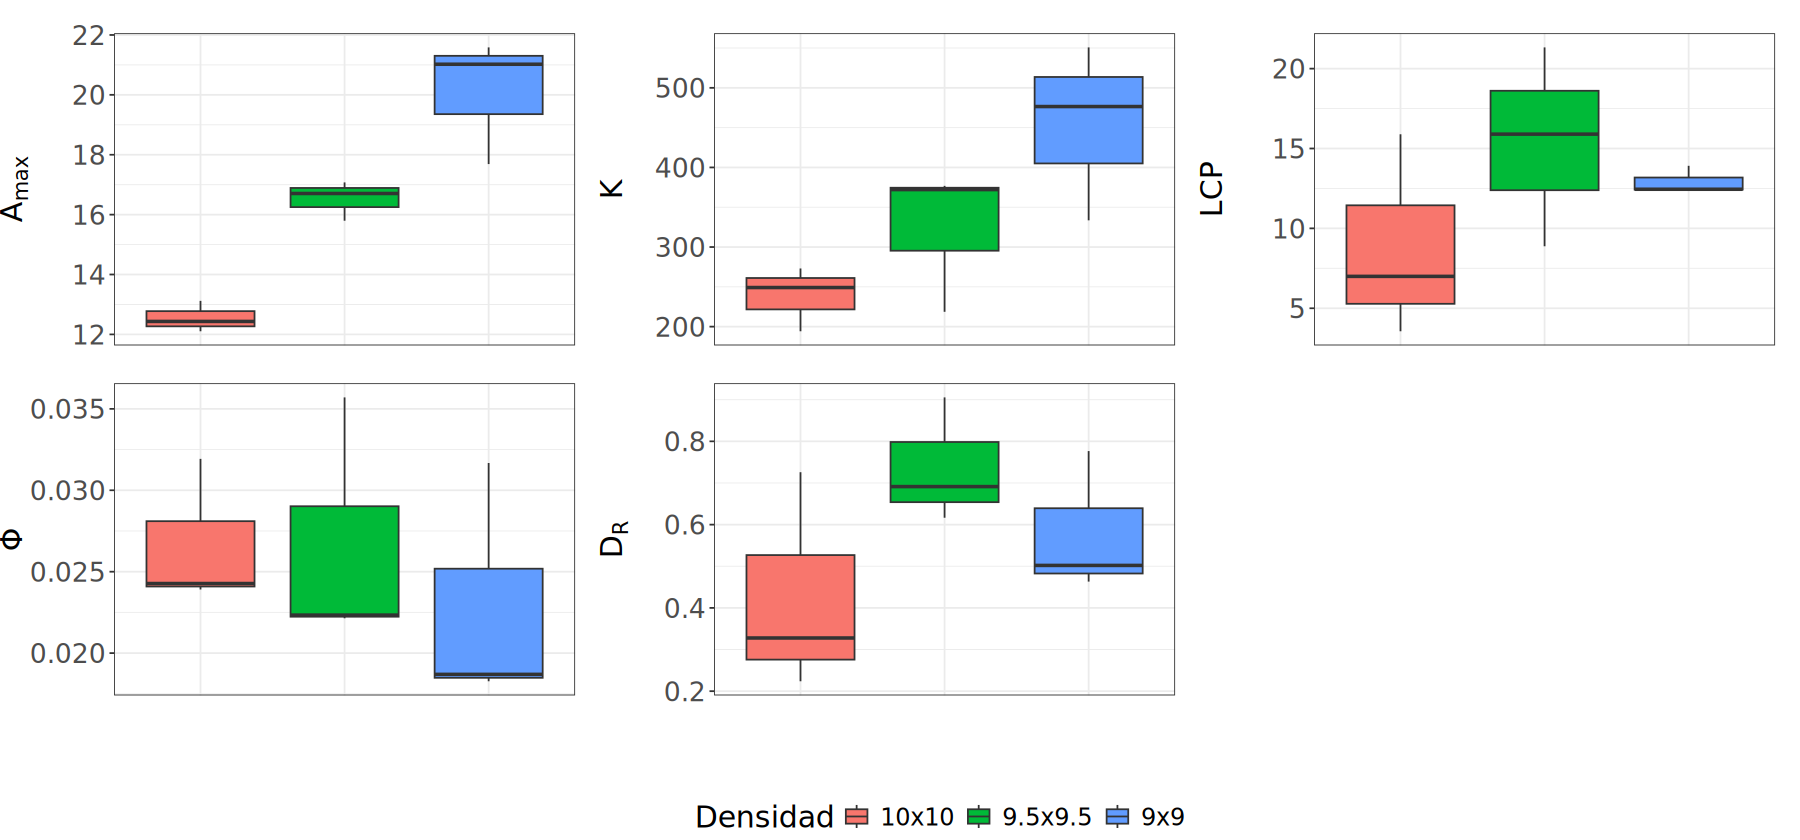

In [5]:
source("photosynthesis_response_curves.R")
density_boxplots <- all_parameters_boxplot(
  density_sample_lr_parameters,
  "Densidad",
  list(
    A_max = expression("A"["max"]),
    K = "K",
    LCP = "LCP",
    Phi = expression(Phi),
    D_r = expression("D"["R"])
  )
)
density_boxplots


In [6]:
cat("❗ All groups\n\n")
all_groups_density <- differences_all_treatments(density_sample_lr_parameters)


❗ All groups

### Checking  A_max :

	One-way analysis of means (not assuming equal variances)

data:  A_max and Treatment
F = 38.448, num df = 2.0000, denom df = 3.5755, p-value = 0.003823

### Checking  K :

	One-way analysis of means (not assuming equal variances)

data:  K and Treatment
F = 4.6211, num df = 2.0000, denom df = 3.3472, p-value = 0.1089

### Checking  LCP :

	One-way analysis of means (not assuming equal variances)

data:  LCP and Treatment
F = 0.68777, num df = 2.0000, denom df = 2.7632, p-value = 0.5723

### Checking  Phi :

	One-way analysis of means (not assuming equal variances)

data:  Phi and Treatment
F = 0.25429, num df = 2.0000, denom df = 3.7226, p-value = 0.7879

### Checking  D_r :

	One-way analysis of means (not assuming equal variances)

data:  D_r and Treatment
F = 1.5249, num df = 2.0000, denom df = 3.8424, p-value = 0.3255



In [7]:
cat("❗ Pair of groups\n\n")
pair_groups_density <- differences_among_treatments(
  density_sample_lr_parameters
)


❗ Pair of groups

### Checking  A_max :

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = as.formula(paste(response, "~", "Treatment")), 
    data = sample_lr_parameters)

Linear Hypotheses:
                     Estimate Std. Error t value Pr(>|t|)    
9.5x9.5 - 10x10 == 0    3.973      1.068   3.719   0.0231 *  
9x9 - 10x10 == 0        7.546      1.068   7.064   <0.001 ***
9x9 - 9.5x9.5 == 0      3.572      1.068   3.344   0.0355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

### Checking  K :

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = as.formula(paste(response, "~", "Treatment")), 
    data = sample_lr_parameters)

Linear Hypotheses:
                     Estimate Std. Error t value Pr(>|t|)  
9.5x9.5 - 10x10 == 0    83.73      69.80   1.200   0.4956  
9x9 - 10x10

In [8]:
cat("❗ P-values Summary\n\n")
density_pvals_summary <- rbind(pair_groups_density, all_groups_density)

density_pvals_summary

cbind(
  density_pvals_summary[, "Comparison"],
  density_pvals_summary[, c("A_max", "K", "LCP", "Phi", "D_r")] < 0.05
)


❗ P-values Summary



Comparison,A_max,K,LCP,Phi,D_r
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.5x9.5 - 10x10,0.0230723841,0.49559073,0.3344174,0.9999918,0.2203442
9x9 - 10x10,0.0005674623,0.04939023,0.6184876,0.7787602,0.6371050
9x9 - 9.5x9.5,0.0354500918,0.22499141,0.8360314,0.7766869,0.6290266
All,0.0038229673,0.10892673,0.5722551,0.7879221,0.3254547


,A_max,K,LCP,Phi,D_r
9.5x9.5 - 10x10,TRUE,FALSE,FALSE,FALSE,FALSE
9x9 - 10x10,TRUE,TRUE,FALSE,FALSE,FALSE
9x9 - 9.5x9.5,TRUE,FALSE,FALSE,FALSE,FALSE
All,TRUE,FALSE,FALSE,FALSE,FALSE


## Leaf age data analysis

In [9]:
cat("### Estimating treatment group parameters:\n\n")
leaf_sample_lr_parameters <- lr_parameters_by_sample(
  leaf_age_data,
  treatment_index = which(colnames(leaf_age_data) == "Leaf")
)
leaf_descriptive_df <- lr_summary_by_treatment(leaf_sample_lr_parameters)


### Estimating treatment group parameters:

Treatment 1 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 1 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 1 x Sample 3 Starting..

Waiting for profiling to be done...



Done!

Treatment 17 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 17 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 17 x Sample 3 Starting..

Waiting for profiling to be done...



Done!

Treatment 33 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 33 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 33 x Sample 3 Starting..

Waiting for profiling to be done...



Done!

Treatment 9 x Sample 1 Starting..

Waiting for profiling to be done...



Done!

Treatment 9 x Sample 2 Starting..

Waiting for profiling to be done...



Done!

Treatment 9 x Sample 3 Starting..

Waiting for profiling to be done...



Done!



,A_max.mean,A_max.stdErr,D_r.mean,D_r.stdErr,K.mean,K.stdErr,LCP.mean,LCP.stdErr,Phi.mean,Phi.stdErr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,14.03368,0.50876544,0.7988331,0.19311756,244.8227,25.04980,14.399959,2.7947885,0.02898910,0.002717239
33,11.89163,0.88132683,0.4054055,0.13719138,313.8587,84.34384,9.058619,1.0919189,0.02202534,0.005744769
17,20.09842,1.21572239,0.5805992,0.09864886,453.5971,63.73978,12.924925,0.4963246,0.02287927,0.004398677
1,12.57408,0.09748702,1.4756682,0.24552486,253.4497,30.01698,33.099676,5.6662023,0.02550071,0.003249677


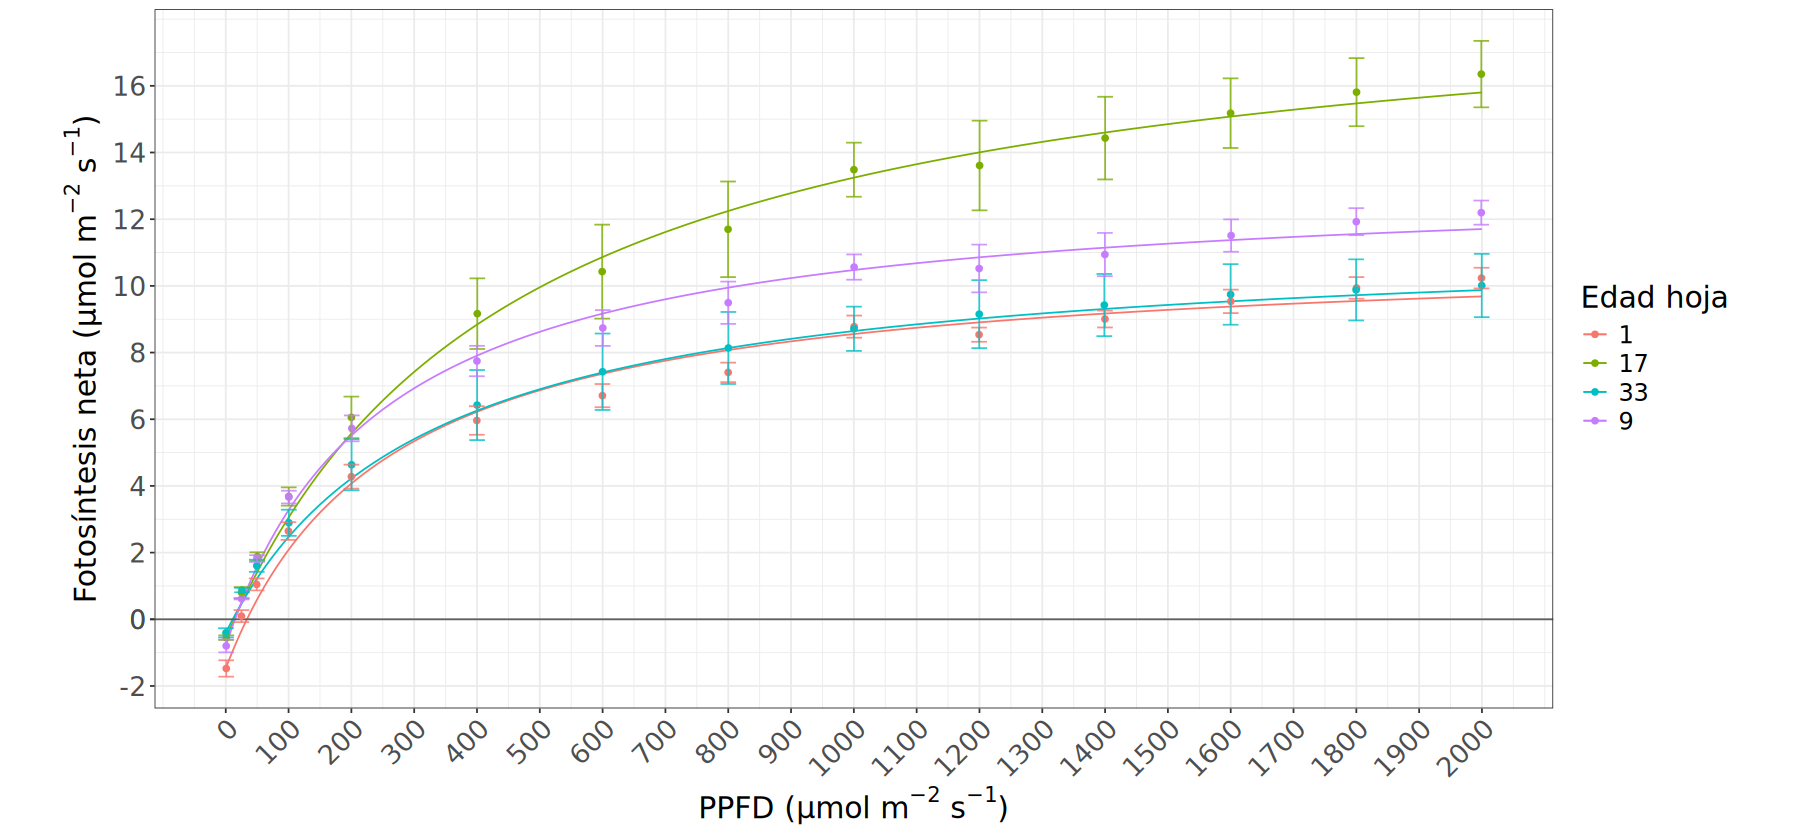

In [10]:
leaf_descriptive_df
leaf_group_summary <- summary_replicates(
  leaf_age_data,
  treatment_index = which(colnames(leaf_age_data) == "Leaf")
)
leaf_lr_plot <- lr_groups_plot(
  leaf_descriptive_df,
  max_qf = 2000, legend_title = "Edad hoja",
  group_summary = leaf_group_summary
)
leaf_lr_plot


### Differences by leaf age

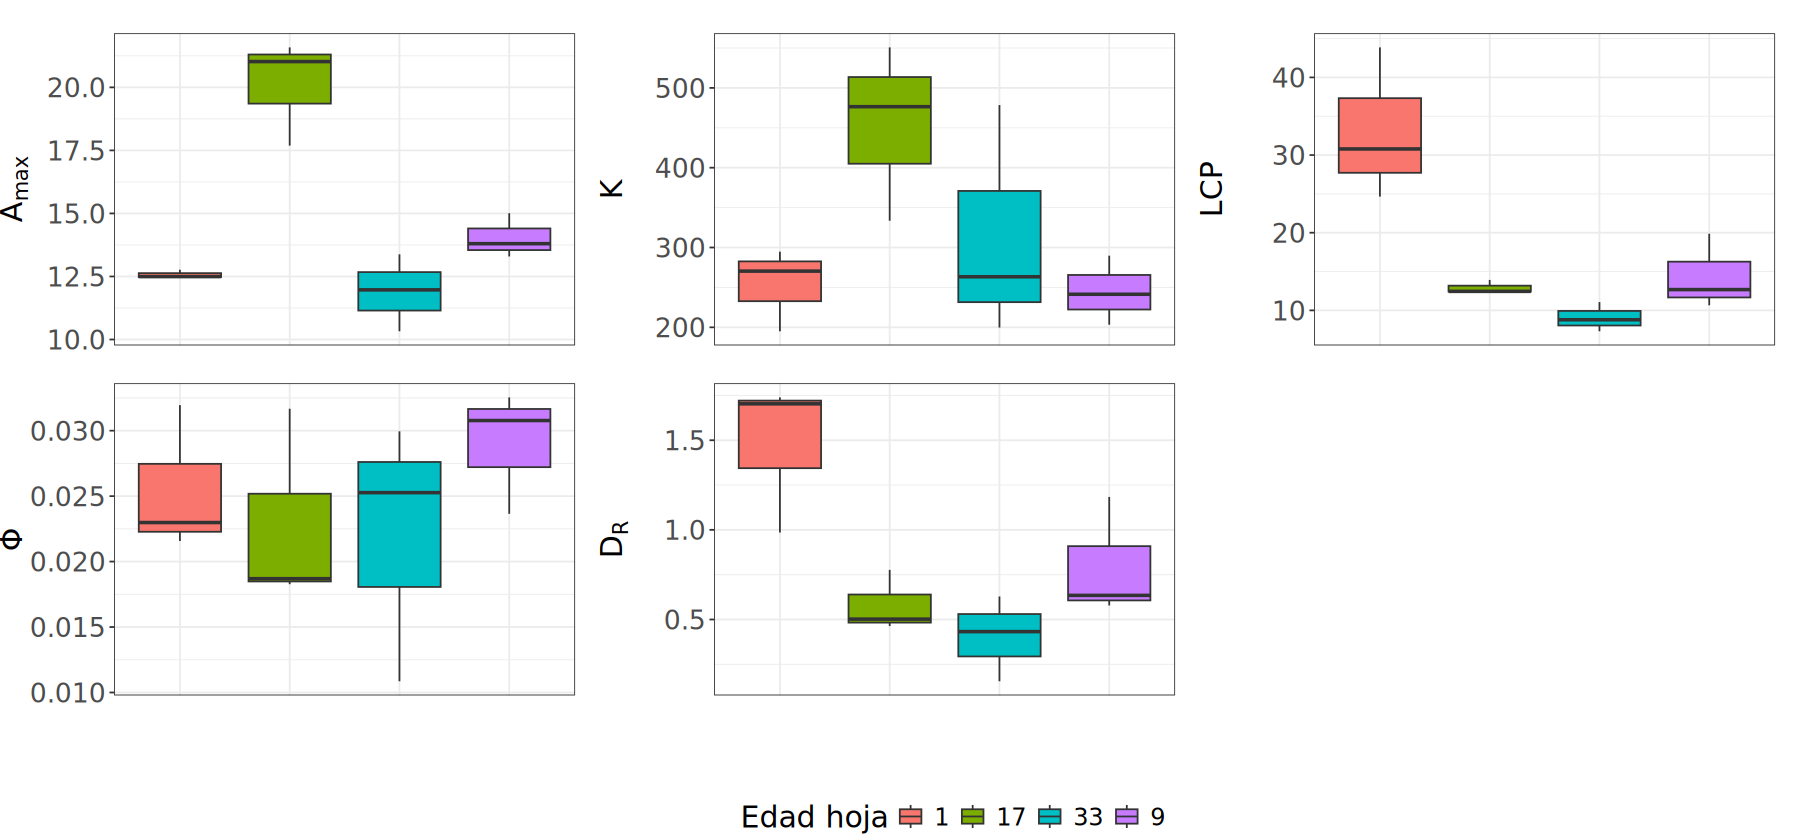

In [11]:
leaf_boxplots <- all_parameters_boxplot(
  leaf_sample_lr_parameters,
  "Edad hoja",
  list(
    A_max = expression("A"["max"]),
    K = "K",
    LCP = "LCP",
    Phi = expression(Phi),
    D_r = expression("D"["R"])
  )
)
leaf_boxplots


In [12]:
cat("❗ All groups\n\n")
all_groups_leaf <- differences_all_treatments(leaf_sample_lr_parameters)


❗ All groups

### Checking  A_max :

	One-way analysis of means (not assuming equal variances)

data:  A_max and Treatment
F = 11.122, num df = 3.0000, denom df = 3.4492, p-value = 0.02908

### Checking  K :

	One-way analysis of means (not assuming equal variances)

data:  K and Treatment
F = 2.4903, num df = 3.0000, denom df = 4.1608, p-value = 0.1948

### Checking  LCP :

	One-way analysis of means (not assuming equal variances)

data:  LCP and Treatment
F = 5.9794, num df = 3.0000, denom df = 3.7418, p-value = 0.06444

### Checking  Phi :

	One-way analysis of means (not assuming equal variances)

data:  Phi and Treatment
F = 0.55956, num df = 3.0000, denom df = 4.3156, p-value = 0.6676

### Checking  D_r :

	One-way analysis of means (not assuming equal variances)

data:  D_r and Treatment
F = 3.941, num df = 3.0000, denom df = 4.2338, p-value = 0.1031



In [13]:
cat("❗ Pair of groups\n\n")
pair_groups_leaf <- differences_among_treatments(
  leaf_sample_lr_parameters
)


❗ Pair of groups

### Checking  A_max :

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = as.formula(paste(response, "~", "Treatment")), 
    data = sample_lr_parameters)

Linear Hypotheses:
             Estimate Std. Error t value Pr(>|t|)    
17 - 1 == 0    7.5243     1.1232   6.699  < 0.001 ***
33 - 1 == 0   -0.6825     1.1232  -0.608  0.92680    
9 - 1 == 0     1.4596     1.1232   1.300  0.58785    
33 - 17 == 0  -8.2068     1.1232  -7.307  < 0.001 ***
9 - 17 == 0   -6.0647     1.1232  -5.400  0.00293 ** 
9 - 33 == 0    2.1420     1.1232   1.907  0.29729    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

### Checking  K :

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = as.formula(paste(response, "~", "Treatment")), 
    data = sample_lr_parameters)

Linear Hypotheses:
 

In [14]:
cat("❗ P-values Summary\n\n")

leaf_pvals_summary <- rbind(pair_groups_leaf, all_groups_leaf)
leaf_pvals_summary

cbind(
  leaf_pvals_summary[, "Comparison"],
  leaf_pvals_summary[, c("A_max", "K", "LCP", "Phi", "D_r")] < 0.05
)


❗ P-values Summary



Comparison,A_max,K,LCP,Phi,D_r
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17 - 1,0.0006425207,0.1324970,0.009393026,0.9692669,0.03028654
33 - 1,0.9268040758,0.8708902,0.003580679,0.9334956,0.01178272
33 - 17,0.0004389841,0.3596491,0.829560644,0.9988427,0.89520049
9 - 1,0.5878521636,0.9995061,0.014243519,0.9328501,0.10235443
9 - 17,0.0029263376,0.1137692,0.987332606,0.7374665,0.82049579
9 - 33,0.2972866219,0.8219310,0.657815506,0.6578769,0.44629006
All,0.0290782971,0.1948494,0.064439616,0.6676458,0.10310878


,A_max,K,LCP,Phi,D_r
17 - 1,TRUE,FALSE,TRUE,FALSE,TRUE
33 - 1,FALSE,FALSE,TRUE,FALSE,TRUE
33 - 17,TRUE,FALSE,FALSE,FALSE,FALSE
9 - 1,FALSE,FALSE,TRUE,FALSE,FALSE
9 - 17,TRUE,FALSE,FALSE,FALSE,FALSE
9 - 33,FALSE,FALSE,FALSE,FALSE,FALSE
All,TRUE,FALSE,FALSE,FALSE,FALSE


In [15]:
sessionInfo()


R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 24.04 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.12.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: America/Bogota
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] multcomp_1.4-26 TH.data_1.1-2   MASS_7.3-60.0.1 survival_3.7-0 
[5] mvtnorm_1.2-5   gtable_0.3.5    cowplot_1.1.3   ggplot2_3.5.1  

loaded via a namespace (and not attached):
 [1] Matrix_1.6-5      jsonlite_1.8.8    dplyr_1.1.4       compiler_4.3.3   
 [5] crayon